In [1]:
# Aula 15 IABD Kmeans - revisão
import pandas as pd #permite criar nossa base de dados
import matplotlib.pyplot as plt #plotagem dos graficos
from sklearn.cluster import KMeans
import seaborn as sns #importa a biblioteca seaborn
from mpl_toolkits.mplot3d import Axes3D #biblioteca graficos 3d

In [2]:
# cria base de dados
dados = pd.DataFrame({
    'Símbolo':["AAPL","Google","MSFT","AMZN","TSLA","FB"],
    'Preço':[150.12,2700.45,300.89,3200.10,700.78,350.40],
    'Volume de negociação':[3000000,1000000, 2500000,  1200000,5000000,900000 ],
    'Capitalização de mercado':[2000000000000, 1800000000000,2200000000000 ,1700000000000,750000000000, 
                                900000000000   ]

})

In [3]:
dados.head() # visualização das primeiras linhas

,Símbolo,Preço,Volume de negociação,Capitalização de mercado
0,AAPL,150.12,3000000,2000000000000
1,Google,2700.45,1000000,1800000000000
2,MSFT,300.89,2500000,2200000000000
3,AMZN,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,750000000000


In [13]:
dados.tail() #exibe as ultimas linhas

,Símbolo,Preço,Volume de negociação,Capitalização de mercado
1,Google,2700.45,1000000,1800000000000
2,MSFT,300.89,2500000,2200000000000
3,AMZN,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,750000000000
5,FB,350.40,900000,900000000000


<Axes: xlabel='Símbolo', ylabel='Preço'>

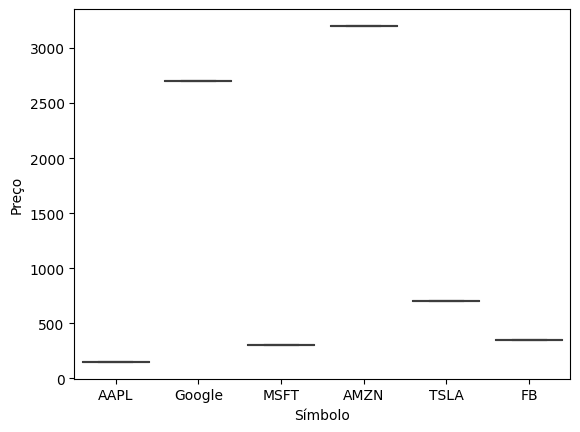

In [4]:
sns.boxplot(x = dados['Símbolo'],y=dados['Preço']) #plota boxplot
plt.title("Boxplot simbolo x preço da ação")

In [5]:
dados_ativos = pd.get_dummies(dados,columns=['Símbolo']) # transforma variaveis categóricas em true ou false

In [6]:
dados_ativos # exibe dados após transformação

,Preço,Volume de negociação,Capitalização de mercado,Símbolo_AAPL,Símbolo_AMZN,Símbolo_FB,Símbolo_Google,Símbolo_MSFT,Símbolo_TSLA
0,150.12,3000000,2000000000000,True,False,False,False,False,False
1,2700.45,1000000,1800000000000,False,False,False,True,False,False
2,300.89,2500000,2200000000000,False,False,False,False,True,False
3,3200.10,1200000,1700000000000,False,True,False,False,False,False
4,700.78,5000000,750000000000,False,False,False,False,False,True
5,350.40,900000,900000000000,False,False,True,False,False,False


In [7]:
kmeans = KMeans(n_clusters=4) # cria 4 clusters
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [8]:
sse = kmeans.inertia_ # métrica inertia
print("SSE",sse)

SSE 1.6250000008425e+22


In [9]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

Text(0, 0.5, 'Preço')

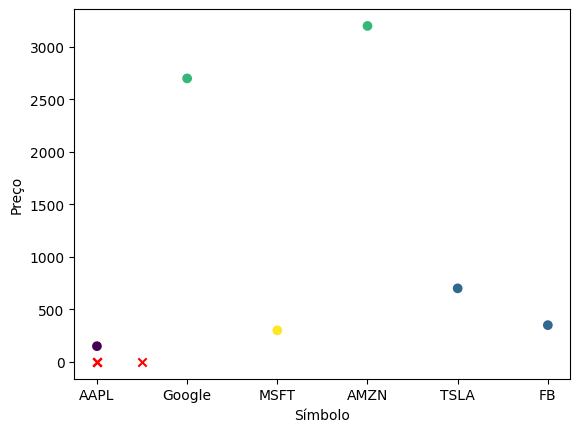

In [10]:
# Plotando o gráfico das visualizações

plt.scatter(dados['Símbolo'],dados['Preço'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Símbolo")
plt.ylabel("Preço")

In [11]:
# Passo 7: Analisar os grupos resultantes
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean()
print(grouped_data)

          Preço  Volume de negociação  Capitalização de mercado  Símbolo_AAPL  \
Grupo                                                                           
0       150.120             3000000.0              2.000000e+12           1.0   
1       525.590             2950000.0              8.250000e+11           0.0   
2      2950.275             1100000.0              1.750000e+12           0.0   
3       300.890             2500000.0              2.200000e+12           0.0   

       Símbolo_AMZN  Símbolo_FB  Símbolo_Google  Símbolo_MSFT  Símbolo_TSLA  
Grupo                                                                        
0               0.0         0.0             0.0           0.0           0.0  
1               0.0         0.5             0.0           0.0           0.5  
2               0.5         0.0             0.5           0.0           0.0  
3               0.0         0.0             0.0           1.0           0.0  


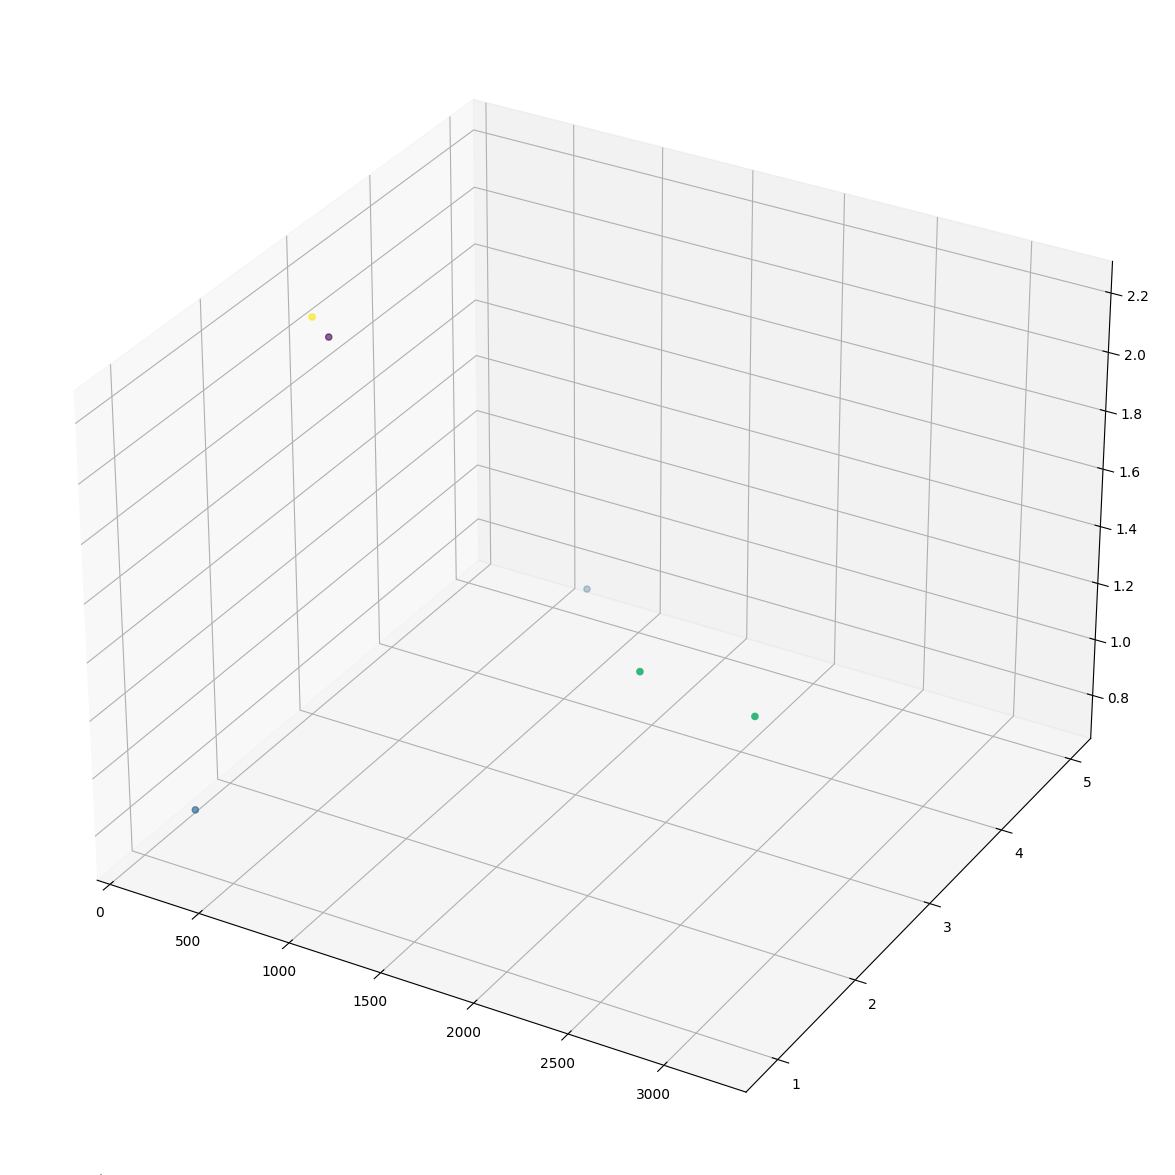

In [12]:
# Criando o gráfico em 3D
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados['Preço'], dados['Volume de negociação'], dados['Capitalização de mercado'], c=labels)
